# Gibbs采样

In [3]:
import numpy as np
import scipy.special as ss
import matplotlib.pyplot as plt

D:\study\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


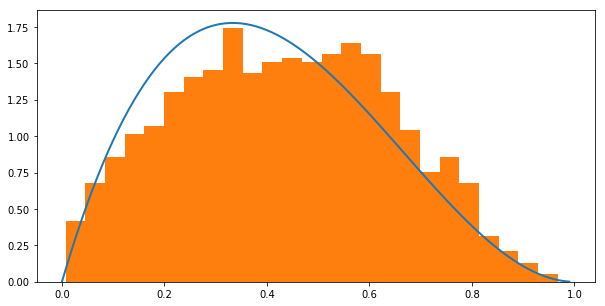

In [26]:
def beta_s(x, a, b):
    return x**(a-1)*(1-x)**(b-1)
def beta(x, a, b):
    return beta_s(x, a, b)/ss.beta(a, b)   # ss.beta返回beta分布的归一化系数, 是概率密度函数的分母部分

def plot_mcmc(a, b):
    cur = np.random.rand()
    states = [cur]
    for i in range(10**5):
        next_, u = np.random.rand(2)
        if u < np.min((beta_s(next_, a, b)/beta_s(cur, a, b), 1)):
            states.append(next_)
            cur = next_
            
    x = np.arange(0, 1, .01)
    plt.figure(figsize=(10, 5))
    plt.plot(x, beta(x, a, b), lw=2, label='real dist: a={}, b={}'.format(a, b))
    plt.hist(states[-1000:], 25, normed=True, label='simu mcmc: a={}, b={}'.format(a, b))
    plt.show()

if __name__ == '__main__':
    plot_mcmc(2, 3)